<a href="https://colab.research.google.com/github/nyksrox/NIKHILR/blob/master/Explanable%20AI%20-%20RF%20Regressor%20With%20Shap%20Values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip install shap

     |████████████████████████████████| 358kB 13.1MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491625 sha256=2ef6cc1db9197ad138ea55f880005acbd7866949aad21813dfc0cda1abd01852
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [3]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import OneHotEncoder
import shap

In [4]:
# loading data from desktop
from google.colab import files
uploaded = files.upload()
## converting into dataframe
import io
df = pd.read_excel(io.BytesIO(uploaded['MortgageRawData2.xlsx']))

Saving MortgageRawData2.xlsx to MortgageRawData2.xlsx


In [5]:
print(df.dtypes)

Month                               object
Week                                object
Quarter                             object
Internal Volumes - Conventional      int64
Mortgage Rate                      float64
Inflation Rate                     float64
Housing Price Index                float64
Treasury Yield                     float64
Unemployment Rate                  float64
GDP Rate                           float64
Initial Unemplyment Claim            int64
Business Confidence Index          float64
Consumer Confidence Index          float64
dtype: object


In [6]:
print(df.head())

  Month    Week  ... Business Confidence Index  Consumer Confidence Index
0   Jan  Week 1  ...                     99.09                      101.7
1   Jan  Week 2  ...                     99.09                      101.7
2   Jan  Week 3  ...                     99.09                      101.7
3   Jan  Week 4  ...                     99.09                      101.7
4   Jan  Week 5  ...                     99.09                      101.7

[5 rows x 13 columns]


In [7]:
df1 = df[['Month','Week','Quarter']]

In [8]:
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit_transform(df1)
print(onehot_encoded)
df3 = pd.DataFrame(onehot_encoded)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 1.]]


In [9]:
df2 = df.drop(columns=['Month','Week','Quarter'])

In [10]:
df4 = pd.concat([df3, df2], axis=1)

In [11]:
print(df4.head())

     0    1  ...  Business Confidence Index  Consumer Confidence Index
0  0.0  0.0  ...                      99.09                      101.7
1  0.0  0.0  ...                      99.09                      101.7
2  0.0  0.0  ...                      99.09                      101.7
3  0.0  0.0  ...                      99.09                      101.7
4  0.0  0.0  ...                      99.09                      101.7

[5 rows x 31 columns]


In [12]:
print(df4.dtypes)

0                                  float64
1                                  float64
2                                  float64
3                                  float64
4                                  float64
5                                  float64
6                                  float64
7                                  float64
8                                  float64
9                                  float64
10                                 float64
11                                 float64
12                                 float64
13                                 float64
14                                 float64
15                                 float64
16                                 float64
17                                 float64
18                                 float64
19                                 float64
20                                 float64
Internal Volumes - Conventional      int64
Mortgage Rate                      float64
Inflation R

In [14]:
X = df4.drop(columns=['Internal Volumes - Conventional'])
y = df4['Internal Volumes - Conventional']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [16]:
# fit the regressor with x and y data
regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [17]:
y_pred=regressor.predict(X_test)

In [19]:
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(mape)

32.17878896499091


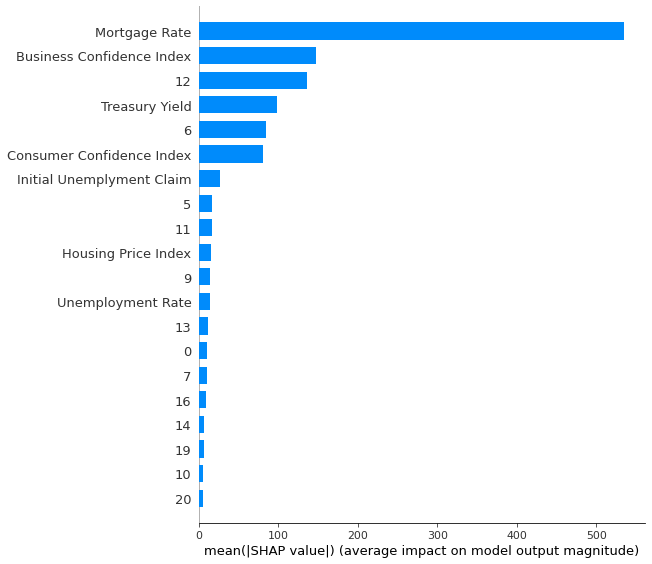

In [20]:
import shap
shap_values = shap.TreeExplainer(regressor).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

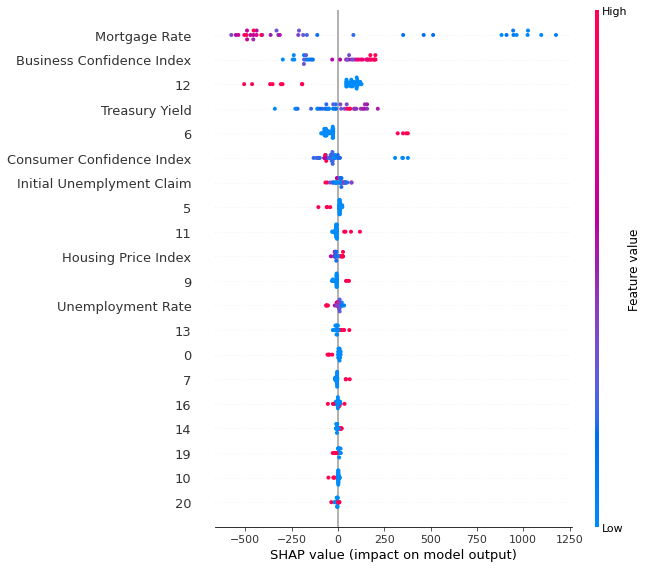

In [25]:
shap.summary_plot(shap_values, X_train)